In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
TRAIN_SET = 'TrainsetTugas4ML.csv'
TEST_SET = 'TestsetTugas4ML.csv'
PREDICTION = 'TebakanTugas4ML.csv'
X = ['X1', 'X2']
Y = 'Class'

### Read data train and data test from file

In [3]:
dftrain = pd.read_csv(TRAIN_SET)
dftest = pd.read_csv(TEST_SET)

n_train = len(dftrain.index)
n_test = len(dftest.index)

### Bagging (Bootstrap Aggregating)
Each bootstrap is a sample (with replacement) from the data train.

In [4]:
n_bagging = 25

models = []
predictions = []
accuracies = {}
for i in range(n_bagging):
    # Create naïve bayes model from each sample
    dfsample = dftrain.sample(frac=1, replace=True)
    model = GaussianNB().fit(dfsample[X], dfsample[Y])
    
    # Calculate the accuracy of the model
    prediction = model.predict(dfsample[X])
    target = dfsample[Y]
    acc = np.mean(np.equal(prediction, target))
    
    models.append(model)
    predictions.append(prediction)
    accuracies['Model {}'.format(i+1)] = '{} %'.format(round(acc*100, 2))
    
pd.DataFrame.from_dict(accuracies, orient='index', columns=['accuracy'])

,accuracy
Model 1,92.28 %
Model 2,94.97 %
Model 3,93.29 %
Model 4,92.95 %
Model 5,94.97 %
Model 6,94.3 %
Model 7,95.3 %
Model 8,95.3 %
Model 9,92.28 %
Model 10,94.97 %


### Calculate the accuracy of bagging
The accuracy is calculated by classifying each data in data train with all the models. The most frequent class that appears will become the prediction. Then the prediction will be compared to the actual class.

In [5]:
predictions = []
for i in range(n_bagging):
    # Get the prediction from each model
    prediction = models[i].predict(dftrain[X])
    predictions.append(prediction)

final_prediction = []
for i in range(n_train):
    # Get the most frequent class for each data
    i_prediction = [p[i] for p in predictions]
    counts = np.bincount(i_prediction)
    f_pred = np.argmax(counts)
    final_prediction.append(f_pred)

dfbagging = dftrain[X].copy()
dfbagging['Class'] = final_prediction

acc = np.mean(np.equal(final_prediction, dftrain[Y]))
print('Bagging Accuracy: {} %'.format(round(acc*100, 2)))

Bagging Accuracy: 94.63 %


### Predict the class each data in data test

In [6]:
predictions = []
for i in range(n_bagging):
    # Get the prediction from each model
    prediction = models[i].predict(dftest[X])
    predictions.append(prediction)

final_prediction = []
for i in range(n_test):
    # Get the most frequent class for each data
    i_prediction = [p[i] for p in predictions]
    counts = np.bincount(i_prediction)
    f_pred = np.argmax(counts)
    final_prediction.append(f_pred)

dfresult = dftest.copy()
dfresult['Class'] = pd.DataFrame(final_prediction)
dfresult

,X1,X2,Class
0,3.30,15.45,2
1,3.90,21.85,2
2,4.60,18.25,2
3,5.20,23.40,2
4,7.05,19.90,2
5,9.75,25.50,2
6,11.65,26.85,2
7,12.75,22.05,2
8,14.05,26.55,2
9,14.15,17.35,2


### Save the classification to a .csv file

In [7]:
dfresult['Class'].to_csv(PREDICTION, index=False, header=False)

# Data Visualization (Supplementary)

In [8]:
def plot(df):
    colours = []
    for i, x in df.iterrows():
        c = 'blue' if x['Class'] == 1 else 'red'
        colours.append(c)
    plt.scatter(df['X1'], df['X2'], c=colours)
    plt.show()

### Data Train

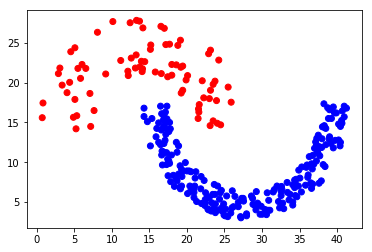

In [9]:
plot(dftrain)

### Bagging Result

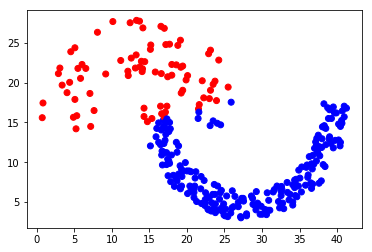

In [10]:
plot(dfbagging)

### Data Test Classification

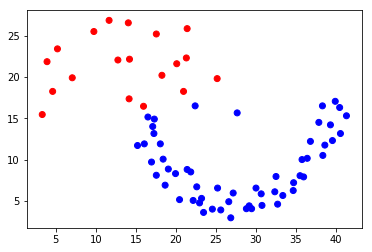

In [11]:
plot(dfresult)